# Question
Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

In [14]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

C:\Users\khurram\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
bos['MEDV'] = boston.target

In [37]:
bos.shape

(506, 14)

In [38]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [39]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# EDA
Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.
Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

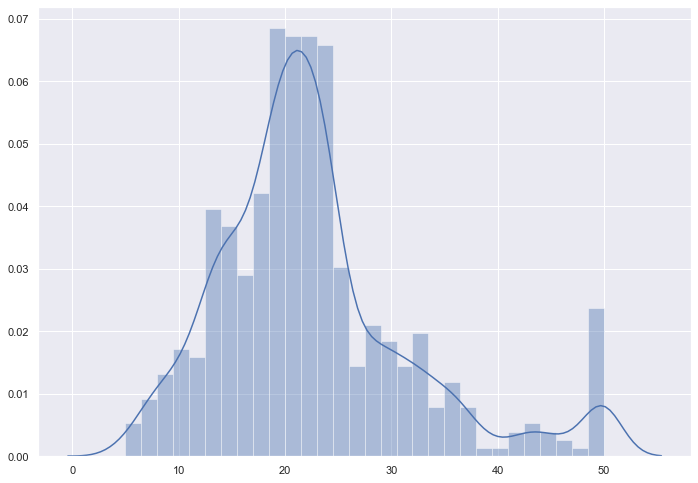

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

### We see that the values of MEDV are distributed normally with few outliers.

### correlation matrix.

<AxesSubplot:>

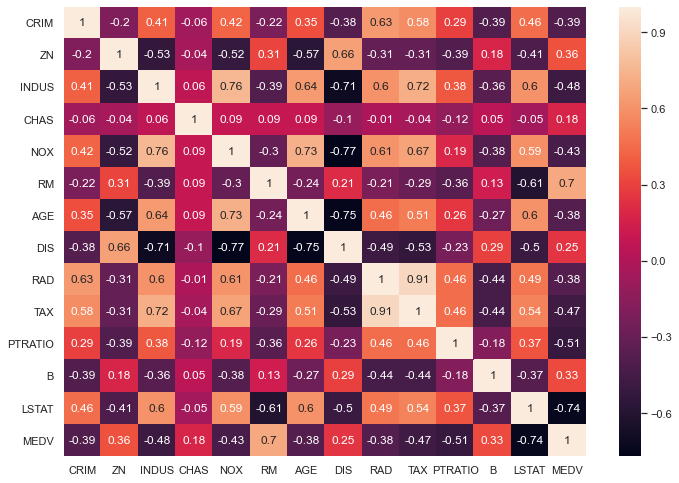

In [41]:
correlation_matrix = bos.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

# Observations:
    -To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

    -An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

#### Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

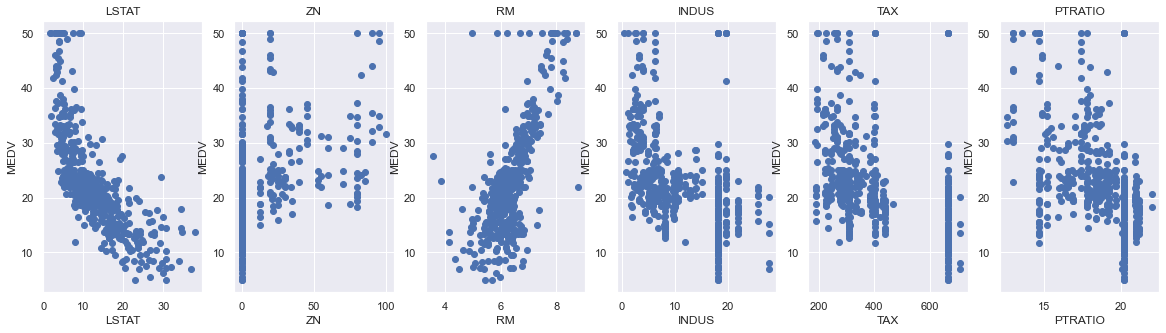

In [97]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'ZN', 'RM', 'INDUS', 'TAX', 'PTRATIO']
target = bos['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Observations:
The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
The prices tend to decrease with an increase in LSTAT, INDUS, TAX, PTRATIO. Though it doesn’t look to be following exactly a linear line.

# Preparing the data for training the model
We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [103]:
X = pd.DataFrame(np.c_[bos['LSTAT'], bos['ZN'], bos['RM'], bos['INDUS'], bos['TAX'], bos['PTRATIO']], 
                 columns = ['LSTAT', 'ZN', 'RM', 'INDUS', 'TAX', 'PTRATIO'])
Y = bos['MEDV']

In [104]:
from sklearn.preprocessing import StandardScaler
scalar_feature = StandardScaler()
scalar_label = StandardScaler()
scaled_X = scalar_feature.fit_transform(X)
scaled_X

array([[-1.0755623 ,  0.28482986,  0.41367189, -1.2879095 , -0.66660821,
        -1.45900038],
       [-0.49243937, -0.48772236,  0.19427445, -0.59338101, -0.98732948,
        -0.30309415],
       [-1.2087274 , -0.48772236,  1.28271368, -0.59338101, -0.98732948,
        -0.30309415],
       ...,
       [-0.98304761, -0.48772236,  0.98496002,  0.11573841, -0.80321172,
         1.17646583],
       [-0.86530163, -0.48772236,  0.72567214,  0.11573841, -0.80321172,
         1.17646583],
       [-0.66905833, -0.48772236, -0.36276709,  0.11573841, -0.80321172,
         1.17646583]])

# Splitting the data into training and testing

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = 0.1, random_state=5)


# Training and testing the model

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

# Model evaluation

In [107]:
from sklearn.metrics import r2_score
score = r2_score(lin_model.predict(X_test),Y_test)
score

0.7274885647419421